In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [81]:
ride_df = pd.read_csv("./raw_data/ride_data.csv")
ride_df.head()


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [82]:
city_df = pd.read_csv("./raw_data/city_data.csv")
city_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [83]:
merge_table = pd.merge(ride_df, city_df, on="city")
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [84]:
grouped = merge_table.groupby('city')

gen_summary_df = grouped['fare'].agg([np.size, np.mean  ])
renamed_df = gen_summary_df.rename(columns={"size":"Total rides","mean":"Average Fare"})
driver_summary = grouped['driver_count'].agg([np.max])
#renamed_df
driver_summary = driver_summary.rename(columns={"amax":"Total Drivers"})
city_type = grouped['type'].agg([np.max])
city_type = city_type.rename(columns={"amax":"Type"})
#city_type
merge_sum = pd.merge(renamed_df, driver_summary, on="city")
merge_summary = pd.merge(merge_sum, city_type, on="city")

merge_summary.head()
#df.iloc[1, 2]

,Total rides,Average Fare,Total Drivers,Type
city,,,,
Amandaburgh,18.0,24.641667,12,Urban
Barajasview,22.0,25.332273,26,Urban
Barronchester,16.0,36.422500,11,Suburban
Bethanyland,18.0,32.956111,22,Suburban
Bradshawfurt,10.0,40.064000,7,Rural


In [85]:
#merge_summary.describe()
y=[]
x=[]
area=[]
clr=[]
cnt = len(merge_summary.index)
cnt
#merge_summary.iloc[1, 2]
for i in range(0,cnt):
    y.append(merge_summary.iloc[i, 1])
    x.append(merge_summary.iloc[i, 0])
#    area.append(np.sqrt(merge_summary.iloc[i, 2]))
    area.append(merge_summary.iloc[i, 2]*5)
    if merge_summary.iloc[i, 3] == 'Urban':
        c = 'red'
    elif merge_summary.iloc[i, 3] == 'Suburban':
        c = 'blue'
    else:
        c = 'green'
        
    clr.append(c)
#clr


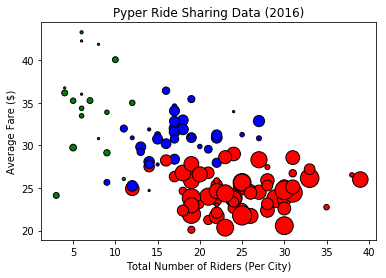

In [86]:
plt.scatter(x, y, marker="o", s=area, facecolors=clr, edgecolors="black")

plt.title("Pyper Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Riders (Per City)")
plt.show()
plt.savefig("./PyScatter.png")

In [87]:
grouped = merge_table.groupby('type')

typ_sum = grouped['fare'].agg([np.size, np.mean  ])
typ_sum = typ_sum.rename(columns={"size":"Total rides","mean":"Average Fare"})

 

typ_ = grouped['type'].agg([np.max  ])
mrg_type =  pd.merge(typ_sum, typ_, on="type")



pclr=[]
lbls = []
totdrv = []
totrides = []

for i in range(0,len(mrg_type)):
    totrides.append(mrg_type.iloc[i,0 ])
    lbls.append(mrg_type.iloc[i,2 ])  

    if mrg_type.iloc[i, 2] == 'Urban':
        c = 'red'
    elif mrg_type.iloc[i, 2] == 'Suburban':
        c = 'blue'
    else:
        c = 'green'
        
    pclr.append(c)
#lbls
#mrg_type
#typ_sum.iloc[0, 0]
#typ_drivers
mrg_type

,Total rides,Average Fare,amax
type,,,
Rural,125.0,34.623440,Rural
Suburban,625.0,30.970128,Suburban
Urban,1625.0,24.525772,Urban


In [88]:
# Labels for the sections of our pie chart

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.2)

Text(0.5,1,'Total Rides by City Type')

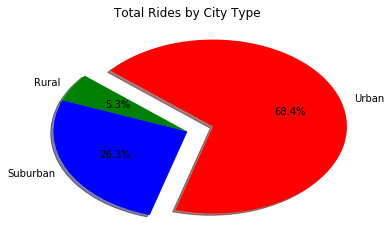

In [89]:
plt.pie(totrides, explode=explode, labels=lbls, colors=pclr,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Rides by City Type")


In [90]:
plt.savefig("./PyPiesRides.png")
plt.show()

In [91]:
#
grouped2 = merge_summary.groupby('Type')
drv_summary_df = grouped2['Total Drivers'].agg([np.sum  ])
drv_summary_df

drvr_type = grouped2['Type'].agg([np.max])
#drvr_type
merge_drvr = pd.merge(drv_summary_df, drvr_type, on="Type")
merge_drvr



,sum,amax
Type,,
Rural,78,Rural
Suburban,490,Suburban
Urban,2405,Urban


In [92]:
pclr=[]
lbls = []
totdrv = []


for i in range(0,len(merge_drvr)):
    totdrv.append(merge_drvr.iloc[i,0 ])
    lbls.append(merge_drvr.iloc[i,1 ])  

    if merge_drvr.iloc[i, 1] == 'Urban':
        c = 'red'
    elif merge_drvr.iloc[i, 1] == 'Suburban':
        c = 'blue'
    else:
        c = 'green'
        
    pclr.append(c)
#totdrv
#mrg_type
#typ_sum.iloc[0, 0]
#typ_drivers
#mrg_type
#totdrv

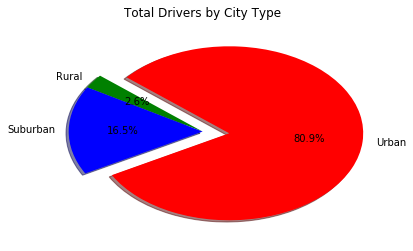

In [93]:
#labels=labels, colors=colors,
plt.pie(totdrv, explode=explode, labels=lbls, colors=pclr,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Drivers by City Type")
plt.show()

In [94]:
plt.savefig("./PyPiesDrivers.png")
